In [27]:
import pandas
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

data = pandas.read_csv("./agaricus-lepiota.csv")
X = pandas.get_dummies(data.drop('edibility', axis='columns')).to_numpy()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X2 = pca.transform(X)
scores = []

for i in range(2, 30):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X2)
    predicted = kmeans.predict(X2)
    #plt.figure()
    #plt.scatter(X2[:, 0], X[:, 1], c=predicted, s=50, cmap='viridis')
    #centers=kmeans.cluster_centers_
    scores.append(silhouette_score(X2, kmeans.fit_predict(X2)))
    #plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    print("k= "+i+"=>  "+scores[-1])
optimal_clusters = scores.index(max(scores))+2 #+2 because we start the loop from two
print("Optimal number of clusters: ", optimal_clusters)

0.44848667429464883
0.6044432228802548
0.6636379316630265
0.6588657363280558
0.6431425552601578
0.5592294259951412
0.5596772572520133
0.5538946576721948
0.5349164342006818
0.45991482634158615
0.4537838892059446
0.3888646068130801
0.3867108654498034
0.3762416557972898
0.3783672596578982
0.3733653993985056
0.3807625278557955
0.35194526347815136
0.3725222481865453
0.35516828850318743
0.34947627790962654
0.3719334613351719
0.34983848506705295
0.3585565502742292
0.34808329187925385
0.34083344871969196
0.3530602101753791
0.34496482157796476
Optimal number of clusters:  4


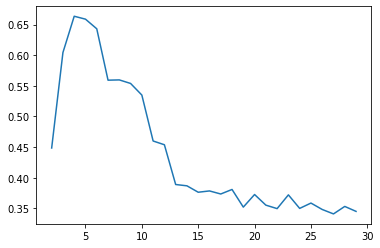

In [29]:
#oppgave2

x_values = [x for x in range(2, 30)]

plt.plot(x_values, scores)

In [ ]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

ax2.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=y_kmeans, s=50, alpha=0.1, cmap='viridis')
centers = kmeans.cluster_centers_
print(y_kmeans.shape)
print(X2.shape)
print(X.shape)
print(centers.shape)

for i in range(0, optimal_clusters):
    print(centers[i, 0], centers[i, 1], centers[i,2])
    ax2.text(centers[i, 0], centers[i, 1], centers[i, 2], '%s' % str(i), size=50)

(8124,)
(8124, 3)
(8124, 117)
(4, 3)
1.0214520257044217 2.6106932047235007 0.1493970844618645
-0.7021901960773148 -0.3747224259446408 0.9479792189567376
-1.4849616578299933 -0.020236030883070844 -1.376533425724372
2.0540196305372245 -1.2070776665943097 -0.49758327739910396


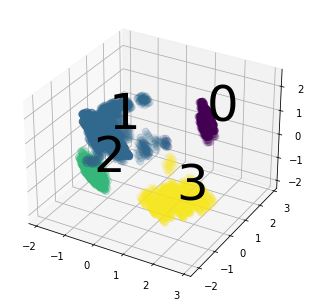

In [30]:
fig2 = plt.figure()
ax2 = Axes3D(fig2)
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(X2)
y_kmeans = kmeans.predict(X2)

ax2.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=y_kmeans, s=50, alpha=0.1, cmap='viridis')
centers = kmeans.cluster_centers_
print(y_kmeans.shape)
print(X2.shape)
print(X.shape)
print(centers.shape)

for i in range(0, optimal_clusters):
    print(centers[i, 0], centers[i, 1], centers[i,2])
    ax2.text(centers[i, 0], centers[i, 1], centers[i, 2], '%s' % str(i), size=50)